## 4DS3

*  Salma Achour
*  Saifeddine Ouled Abid Encir
*  Elyes Ben Dakhlia
*  Mohamed Laroussi



<h1> LAB 4 : Réseau de neurones à convolution </h1>

<p>Pour un ordinateur, une image est une matrice de valeurs correspondant aux pixels. Une image en couleur possède trois canaux. C'est à dire qu'on a 3 valeurs pour chaque pixels. Ces trois valeurs représentent le niveau de rouge, de vert et de bleu. On peut imaginer 3 matrices constituées de valeurs de pixels superposées, donnant une matrice en 3D. Par exemple, pour une image d'une taille de 200 par 200 pixels, sa matrice correspondante aura une taille de 200 multiplié par 200 multiplié par 3 (nombre de canaux). En revanche, pour une image en noir et blanc, sa matrice correspondante ne sera qu'en 2D car possédant qu'un seul canal. Ici, la valeur d'un pixel indique le niveau de gris, cela suffit pour une image en noir et blanc. Les valeurs d'un pixel sont mappées sur 256 bits, c'est-à-dire allant de 0 à 255.
Lorsqu'on compare deux images directement entres elles, s’il y a ne serait-ce qu’un pixel contenant différentes valeurs, alors les images sont considérées comme étant différentes par l’ordinateur. C’est là que les CNNs entrent en jeu.    
</p>




<h2> Filte </h2>
Comme une image, le filtre est une matrice de valeurs mais elle a généralement de petites dimensions et bien souvent carrées. La taille de filtre la plus utilisée est de 3 par 3.

![image.png](attachment:image.png)

Un filtre sert à faire extraire certaines caractéristiques d'une image donnée (couleur, contour, luminosité, netteté, etc...). Ce filtre va etre déplacé par pas successifs sur l'ensemble de image.
![image.png](attachment:image.png)
 

Pour chaque position du filtre, les valeurs des deux matrices en superposition (filtre et image à traiter) sont multipliées. Chaque valeur ainsi inférée est projetée dans une nouvelle matrice. Cette matrice représente une nouvelle image qui fait ressortir les caractéristiques recherchées au travers du filtre.
L'image ci-dessous montre un exemple de calcul. Les valeurs de l'image à traiter sont anormalement petites, mais c'est juste pour comprendre plus facilement le calcul effectué:
![image.png](attachment:image.png)

En fonction des valeurs et de la taille de la matrice du filtre, nous obtenons une nouvelle image plus ou moins modifiée. Par exemple, avec une première image comme celle affichée ci-dessous, on peut la transformer dans le but de produire plusieurs variantes. Voici le résultat de différentes transformations à l'aide de plusieurs filtres couramment utilisés (détection de bord, floutage, etc...)

![image.png](attachment:image.png)

<p>Le nombre de filtres determinera le nombre de caractéristiques détectées. Ce nombre est appelé la profondeur. L'usage de filtres est la base dans un réseau à convolution. En pratique, lors de la phase d'entrainement, plusieurs filtres sont testés avec des valeurs différentes. Les meilleures, par rapport au jeu d'entrainement, sont retenues. Les paramètres essentiels doivent être précisés avant l'entrainement, notamment: le nombre, la taille des filtres et leur pas de déplacement.</p>

</p>Il est préférable de ne pas utiliser de filtres trop petits ou un nombre de filtres trop important car cela peut entraîner un sur-apprentissage.</p>

 

 

<h2> Le Pooling</h2>
Le Pooling est un procédé important dans un réseau à convolution. En extrayant les valeurs importantes des pixels, il permet de réduire une image tout en conservant les caractéristiques pertinentes. La méthode la plus utilisée est le "Max Pooling". Elle consiste à réduire l'image en conservant les valeurs les plus grandes des pixels. Pour ce faire, on a une tuile qui se déplace (comme un filtre) sur la surface de notre image. À chaque position de la tuile, on extrait la valeur la plus haute et ne retient que celle là. Cela produit une nouvelle image avec uniquement les valeurs remarquables de l'image.

L'image ci dessous montre un exemple de Pooling. La tuile a, ici, des dimensions de 3 par 3. L'image de 9 par 9 pixels de départ est réduite en une image de 7 par 7 pixels.
![image.png](attachment:image.png)
En réduisant l'image, le nombre de données traitées diminue et donc le temps de calcul sera aussi réduit. 
Il existe d'autres méthodes que le "Max Pooling", par exemple:<ul>

<li>"Average Pooling" : Moyenne de toutes les valeurs recouvertes par la tuile.</li>

<li>"Pooling stochastique" : Ne retient qu'une seule valeur, comme le "Max Pooling", mais en se basant sur une méthode probabiliste.</li></ul>

En pratique, le "Max Pooling" est la méthode qui donne le plus souvent les meilleurs resultats.



<h2>La convolution</h2>
<p>Le principe d'un réseau à convolution, c'est l'enchainement d'étapes. Chaque étape consiste à appliquer des filtres puis une phase de Pooling sur le résulat de chaque filtre.
L'image obtenue après la première étape est réutilisée en entrée de l'étape suivante (filtrage + pooling) et ainsi de suite... Chaque étape est appellé un niveau. Un réseau à convolution peut avoir plusieurs niveaux.

Lors de l'apprentissage, chaque niveau de convolution doit retenir les filtres les plus pertinents. Cette selection est opérée grâce à un réseau neuronal interne à chaque niveau de convolution. Comme dans un réseau neuronal classique, les poids et biais de ce réseau évoluent; le critère de convergence étant, que les patterns ("images") en sortie caractérisent le mieux l'image de départ.</p>


<h1> Travail demandé </h1>

<p>Durant cette séance est nous allons classer les images en niveaux de gris de chiffres manuscrits (28 pixels par 28 pixels), dans leurs 10 catégories (0 à 9) en utilisant un réseau de neurones  à convolution . Implémenter un réseau neuronal composé de couches convolutives et entièrement connectées pour classer les chiffres manuscrits de l'ensemble de données MNIST. L'ensemble de données étiqueté se compose de 42000 images de taille 28x28 = 784 pixels (niveau de gris), y compris les étiquettes correspondantes de 0, .., 9. L'ensemble de test comprend 28 000 images. Chaque image est normalisée de telle sorte que chaque pixel prend des valeurs dans la plage [0,1].

</p> 


In [4]:
import keras
from keras.utils import to_categorical
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import SGD
from keras import regularizers
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [ ]:
# Initialisation
batch_size = 64
num_classes = 10
epochs = 10

In [ ]:
# input image dimensions
img_rows, img_cols = 28,28

In [7]:
# load the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


In [ ]:
# reshape images 
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
input_shape = (60000, 28, 28)

In [ ]:
# Normalise images
x_train =x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255.0
x_test /= 255.0

In [ ]:
# convert class vectors to binary class matrices
train_labels = to_categorical(y_train)
test_labels = to_categorical(y_test)

# SIMPLE HOLD-OUT VALIDATION

## Setting aside a validation set

In [ ]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

partial_train_labels = to_categorical(partial_y_train)
y_val_labels = to_categorical(y_val)


### Defining the model

In [12]:
model1 = Sequential()
# keras.layers.Conv2D(filters, kernel_size, strides=(1, 1), padding='valid')
model1.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1))) #Conv2D avec 32 filters , kernel size 3*3 , relu activation , input shape     
model1.add(Conv2D(64, (3, 3), activation='relu')) #Conv2D avec 64 filters , kernel size 3*3 , relu activation
model1.add(MaxPooling2D((2, 2))) #MaxPooling2D avec pool_size 2*2
model1.add(Flatten()) # Flatten
model1.add(Dense(128, activation='relu')) # Dense avec 128 units 
model1.add(Dense(10, activation='softmax')) # Dense

In [13]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 1,199,882
Trainable params: 1,199,882
Non-trainable params: 0
____________________________________________

### Compiling the model

In [14]:
 #opt = SGD(lr=0.01, momentum=0.9)

model1.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])


### Training the model:

In [15]:
history = model1.fit(partial_x_train,partial_train_labels,epochs = 10, batch_size = 32,validation_data=(x_val, y_val_labels))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 50000 samples, validate on 10000 samples
Epoch 1/10





50000/50000 [==============================] - 24s 472us/step - loss: 0.1165 - acc: 0.9633 - val_loss: 0.0648 - val_acc: 0.9802
Epoch 2/10
50000/50000 [==============================] - 8s 156us/step - loss: 0.0412 - acc: 0.9874 - val_loss: 0.0555 - val_acc: 0.9841
Epoch 3/10
50000/50000 [==============================] - 8s 162us/step - loss: 0.0280 - acc: 0.9915 - val_loss: 0.0518 - val_acc: 0.9878
Epoch 4/10
50000/50000 [==============================] - 8s 161us/step - loss: 0.0203 - acc: 0.9942 - val_loss: 0.0498 - val_acc: 0.9878
Epoch 5/10
50000/50000 [==============================] - 8s 160us/step - loss: 0.0156 - acc: 0.9960 - val_loss: 0.0554 - val_acc: 0.9885
Epoch 6/10
50000/50000 [==============================] - 8s 156us/step - loss: 0.0117 - acc: 0.9965 - val_loss: 0.0680 - val_acc: 0.9876
Epoch 7/10
50000/50

In [16]:
score1 = model1.evaluate(x_test,test_labels)
print('Test loss:', score1[0])
print('Test accuracy:', score1[1])

10000/10000 [==============================] - 1s 58us/step
Test loss: 0.0802682338032306
Test accuracy: 0.9902


## **Plotting the training and validation loss**

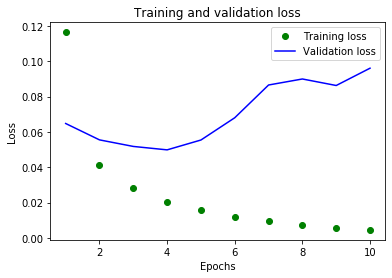

In [17]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(history_dict['acc']) + 1)
plt.plot(epochs, loss_values, 'go', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

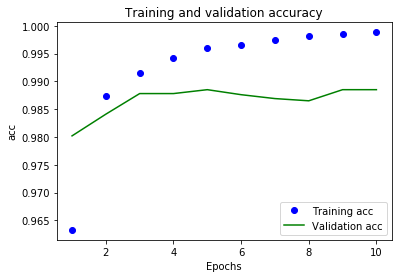

In [18]:
plt.clf()
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
plt.plot(epochs, history_dict['acc'], 'bo', label='Training acc')
plt.plot(epochs, history_dict['val_acc'], 'g', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('acc')
plt.legend()
plt.show()

## Conclusions:


the training loss decreases with every epoch, and the training accuracy increases with every epoch
that isn’t the case for the validation loss and accuracy: 
=> ***Overfiting***



# **Model 2:**

---



### **To avoid overfitting we can :**
### * added a regulizer 
### * Add dropout
### * decrease the number of norones in order to Reduce the capacity of the network
### * added another MaxPooling layer to concentrate on the most intense colors ### and decrease the number of parameters.


## **Defining the model and adding an extra layer of MAxPooling**

In [ ]:
model = Sequential()
#keras.layers.Conv2D(filters, kernel_size, strides=(1, 1), padding='valid')
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1))) #Conv2D avec 32 filters , kernel size 3*3 , relu activation , input shape     
model.add(MaxPooling2D((2, 2))) #MaxPooling2D avec pool_size 2*2
model.add(Conv2D(64, (3, 3), activation='relu')) #Conv2D avec 64 filters , kernel size 3*3 , relu activation
model.add(MaxPooling2D((2, 2))) #MaxPooling2D avec pool_size 2*2
model.add(Conv2D(64, (3, 3), activation='relu')) #Conv2D avec 64 filters , kernel size 3*3 , relu activation
model.add(Flatten()) # Flatten
model.add(Dense(128, activation='relu')) # Dense avec 128 units 
model.add(Dense(10, activation='softmax')) # Dense

In [70]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_7 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 128)              

as we can see the first Total params Model is **1,199,882** and the second is **130,890**

### Compiling the model

In [ ]:
#opt = SGD(lr=0.01, momentum=0.9)
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

### Training the model

In [39]:
history2 = model.fit(partial_x_train,partial_train_labels,epochs=10,batch_size=64,validation_data=(x_val, y_val_labels))

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 5s 92us/step - loss: 0.1707 - acc: 0.9466 - val_loss: 0.1086 - val_acc: 0.9663
Epoch 2/10
50000/50000 [==============================] - 4s 76us/step - loss: 0.0476 - acc: 0.9850 - val_loss: 0.0654 - val_acc: 0.9811
Epoch 3/10
50000/50000 [==============================] - 4s 76us/step - loss: 0.0336 - acc: 0.9897 - val_loss: 0.0383 - val_acc: 0.9885
Epoch 4/10
50000/50000 [==============================] - 4s 76us/step - loss: 0.0249 - acc: 0.9918 - val_loss: 0.0323 - val_acc: 0.9908
Epoch 5/10
50000/50000 [==============================] - 4s 78us/step - loss: 0.0197 - acc: 0.9941 - val_loss: 0.0386 - val_acc: 0.9905
Epoch 6/10
50000/50000 [==============================] - 4s 82us/step - loss: 0.0149 - acc: 0.9955 - val_loss: 0.0488 - val_acc: 0.9881
Epoch 7/10
50000/50000 [==============================] - 4s 78us/step - loss: 0.0131 - acc: 0.9961 - val_loss: 0.0506 - val_acc

In [40]:
history_dict = history2.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

In [41]:
score = model.evaluate(x_test,test_labels)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

10000/10000 [==============================] - 1s 58us/step
Test loss: 0.042497919273262415
Test accuracy: 0.9911


### Plotting the training and validation loss

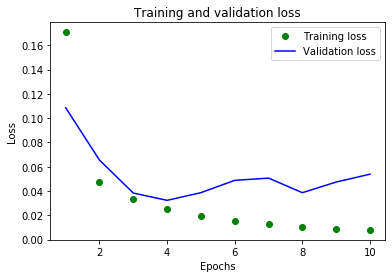

In [42]:

history_dict = history2.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(history_dict['acc']) + 1)
plt.plot(epochs, loss_values, 'go', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

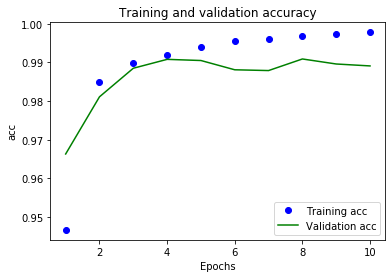

In [43]:
plt.clf()
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
plt.plot(epochs, history_dict['acc'], 'bo', label='Training acc')
plt.plot(epochs, history_dict['val_acc'], 'g', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('acc')
plt.legend()
plt.show()

# It's clear that the over fitting starts at the 4th epoch. so our Final Model parameters are :

### **epochs=4**
### **batch_size=64**
### **optimizer=rmsprop**
### **loss=categorical_crossentropy**

# **Final Model**


---






In [72]:
history3 = model.fit(partial_x_train,partial_train_labels,epochs=4,batch_size=64,validation_data=(x_val, y_val_labels))

Train on 50000 samples, validate on 10000 samples
Epoch 1/4
50000/50000 [==============================] - 5s 93us/step - loss: 0.1691 - acc: 0.9461 - val_loss: 0.0821 - val_acc: 0.9743
Epoch 2/4
50000/50000 [==============================] - 4s 77us/step - loss: 0.0474 - acc: 0.9854 - val_loss: 0.0416 - val_acc: 0.9870
Epoch 3/4
50000/50000 [==============================] - 4s 78us/step - loss: 0.0320 - acc: 0.9902 - val_loss: 0.0752 - val_acc: 0.9781
Epoch 4/4
50000/50000 [==============================] - 4s 77us/step - loss: 0.0247 - acc: 0.9921 - val_loss: 0.0402 - val_acc: 0.9898


In [73]:
score = model.evaluate(x_test,test_labels)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

10000/10000 [==============================] - 1s 53us/step
Test loss: 0.027375477040464467
Test accuracy: 0.9916


 the densely connected network from the last workshop had a test accuracy of 97%,
the basic convnet has a test accuracy of 99% => We are good to go